In [ ]:
import pandas as pd
path = '"C:\Users\Rahul\Desktop\System\Machine Learning Internship\Projects-20240722T093004Z-001\My Project\Mobile Phone Pricing\dataset.csv"'
mobile_data =pd.read_csv(path)

In [ ]:
df = pd.DataFrame(mobile_data)
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
numec_cols = df.select_dtypes(include='number').columns
numec_cols.shape
#categorical_cols = df.select_dtypes(include='object').coulmns  :- No categorical data here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [ ]:
numerical_data = df[numec_cols]
numerical_data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [ ]:
features = numec_cols.drop('price_range')
print(features)
X = mobile_data[features]
print(X.head())
y = mobile_data.price_range
print(y.head())

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145  

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
reg = LinearRegression()
reg.fit(X_train,y_train)


LinearRegression()

In [ ]:
reg.coef_
reg.intercept_

np.float64(-1.6167728066866167)

In [ ]:
# Make prediction
y_pred = reg.predict(X_test)

# Evaluate the model and calculated the MSE
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared error:{mse:.2f}")
print(f"R**2 squared: {r2:.2f}")
y_pred.shape

Mean Squared error:0.10
R**2 squared: 0.92


(400,)

In [ ]:
# look at the coefients weights

coefficients = pd.DataFrame({
    'Features': features,
    'coefficients': reg.coef_
})
coefficients = coefficients.sort_values('coefficients', ascending=True)

print("intercept:",reg.intercept_)
print("\nFeatures and their coefficients:")
print(coefficients)

intercept: -1.6167728066866167

Features and their coefficients:
         Features  coefficients
19           wifi     -0.020490
3        dual_sim     -0.018812
18   touch_screen     -0.018340
7           m_dep     -0.015583
5          four_g     -0.011499
2     clock_speed     -0.004934
10             pc     -0.001264
8       mobile_wt     -0.000792
14           sc_h      0.000197
15           sc_w      0.000199
11      px_height      0.000281
12       px_width      0.000281
0   battery_power      0.000518
13            ram      0.000948
6      int_memory      0.000998
16      talk_time      0.001059
4              fc      0.001890
9         n_cores      0.003761
1            blue      0.013723
17        three_g      0.024652


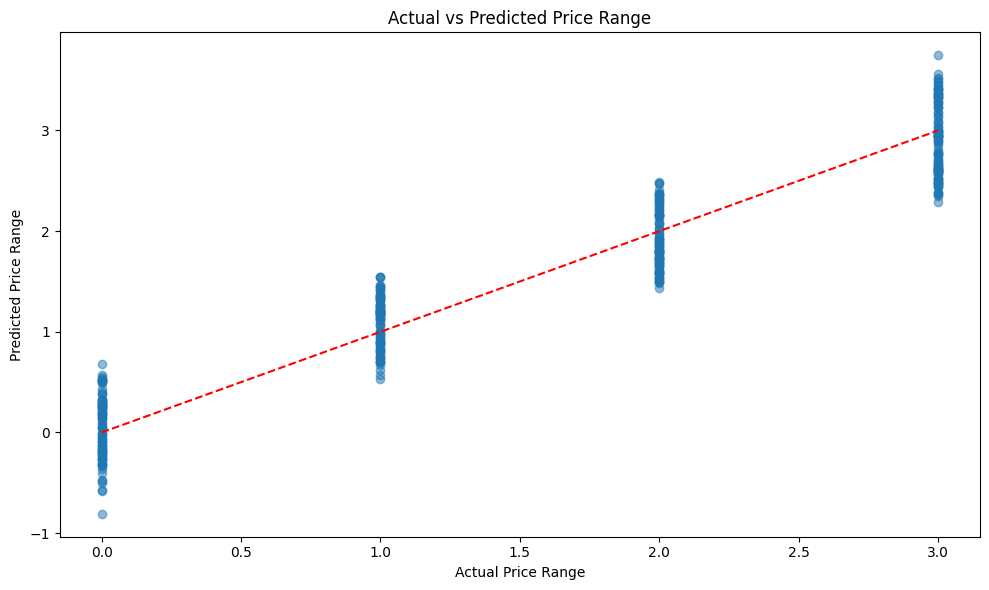

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Price Range')
plt.ylabel('Predicted Price Range')
plt.title('Actual vs Predicted Price Range')
plt.tight_layout()
plt.show()


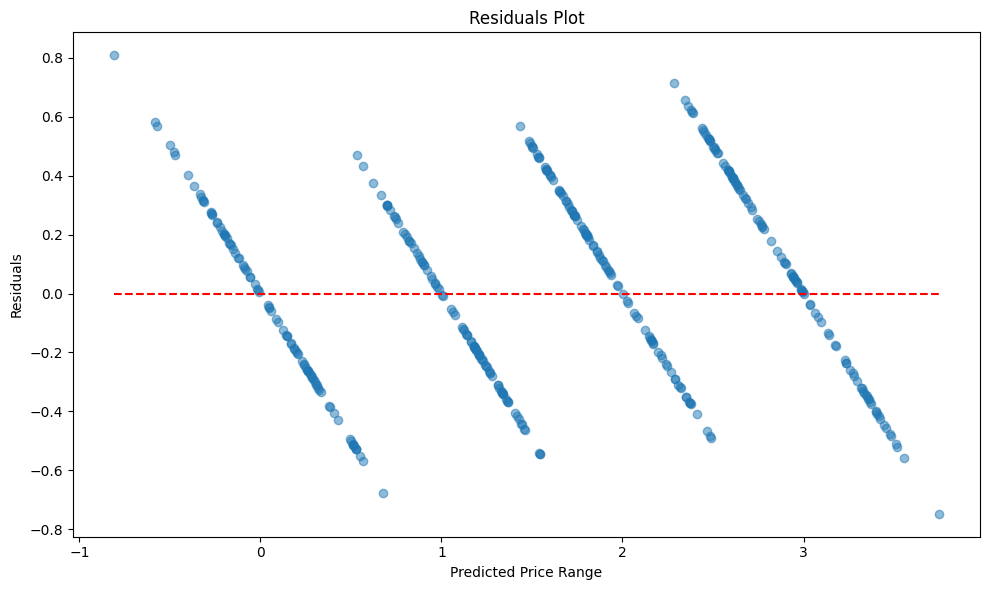

In [ ]:
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='r', linestyles='--')
plt.xlabel('Predicted Price Range')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.tight_layout()
plt.show()


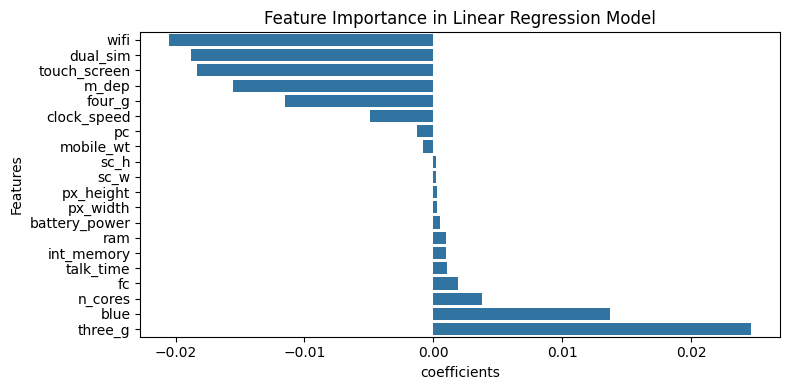

In [ ]:
# Plot feature importance (coefficients)
import seaborn as sns
plt.figure(figsize=(8, 4))
sns.barplot(x='coefficients', y='Features', data=coefficients)
plt.title('Feature Importance in Linear Regression Model')
plt.tight_layout()
plt.show()


In [ ]:
X['battery_power'].values[:400].shape


(400,)

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/dataset.csv'
df = mobile_data = pd.read_csv(path)

In [ ]:
mobile_data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
# EDA

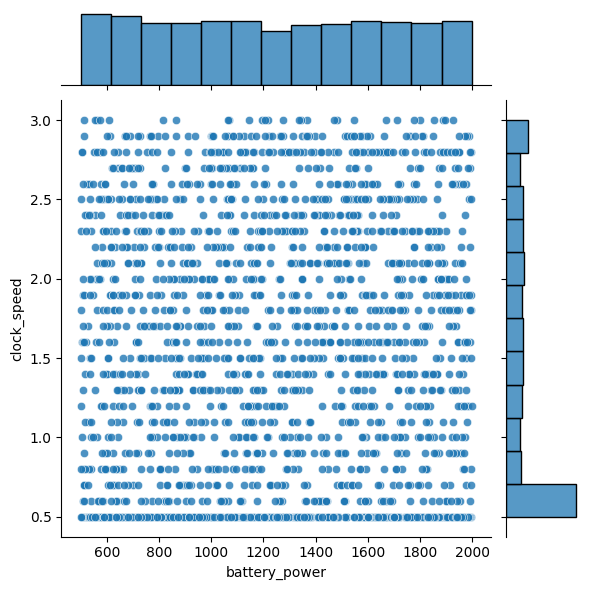

In [ ]:
sns.jointplot(x='battery_power', y='clock_speed', data=df, alpha=0.8)


In [ ]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

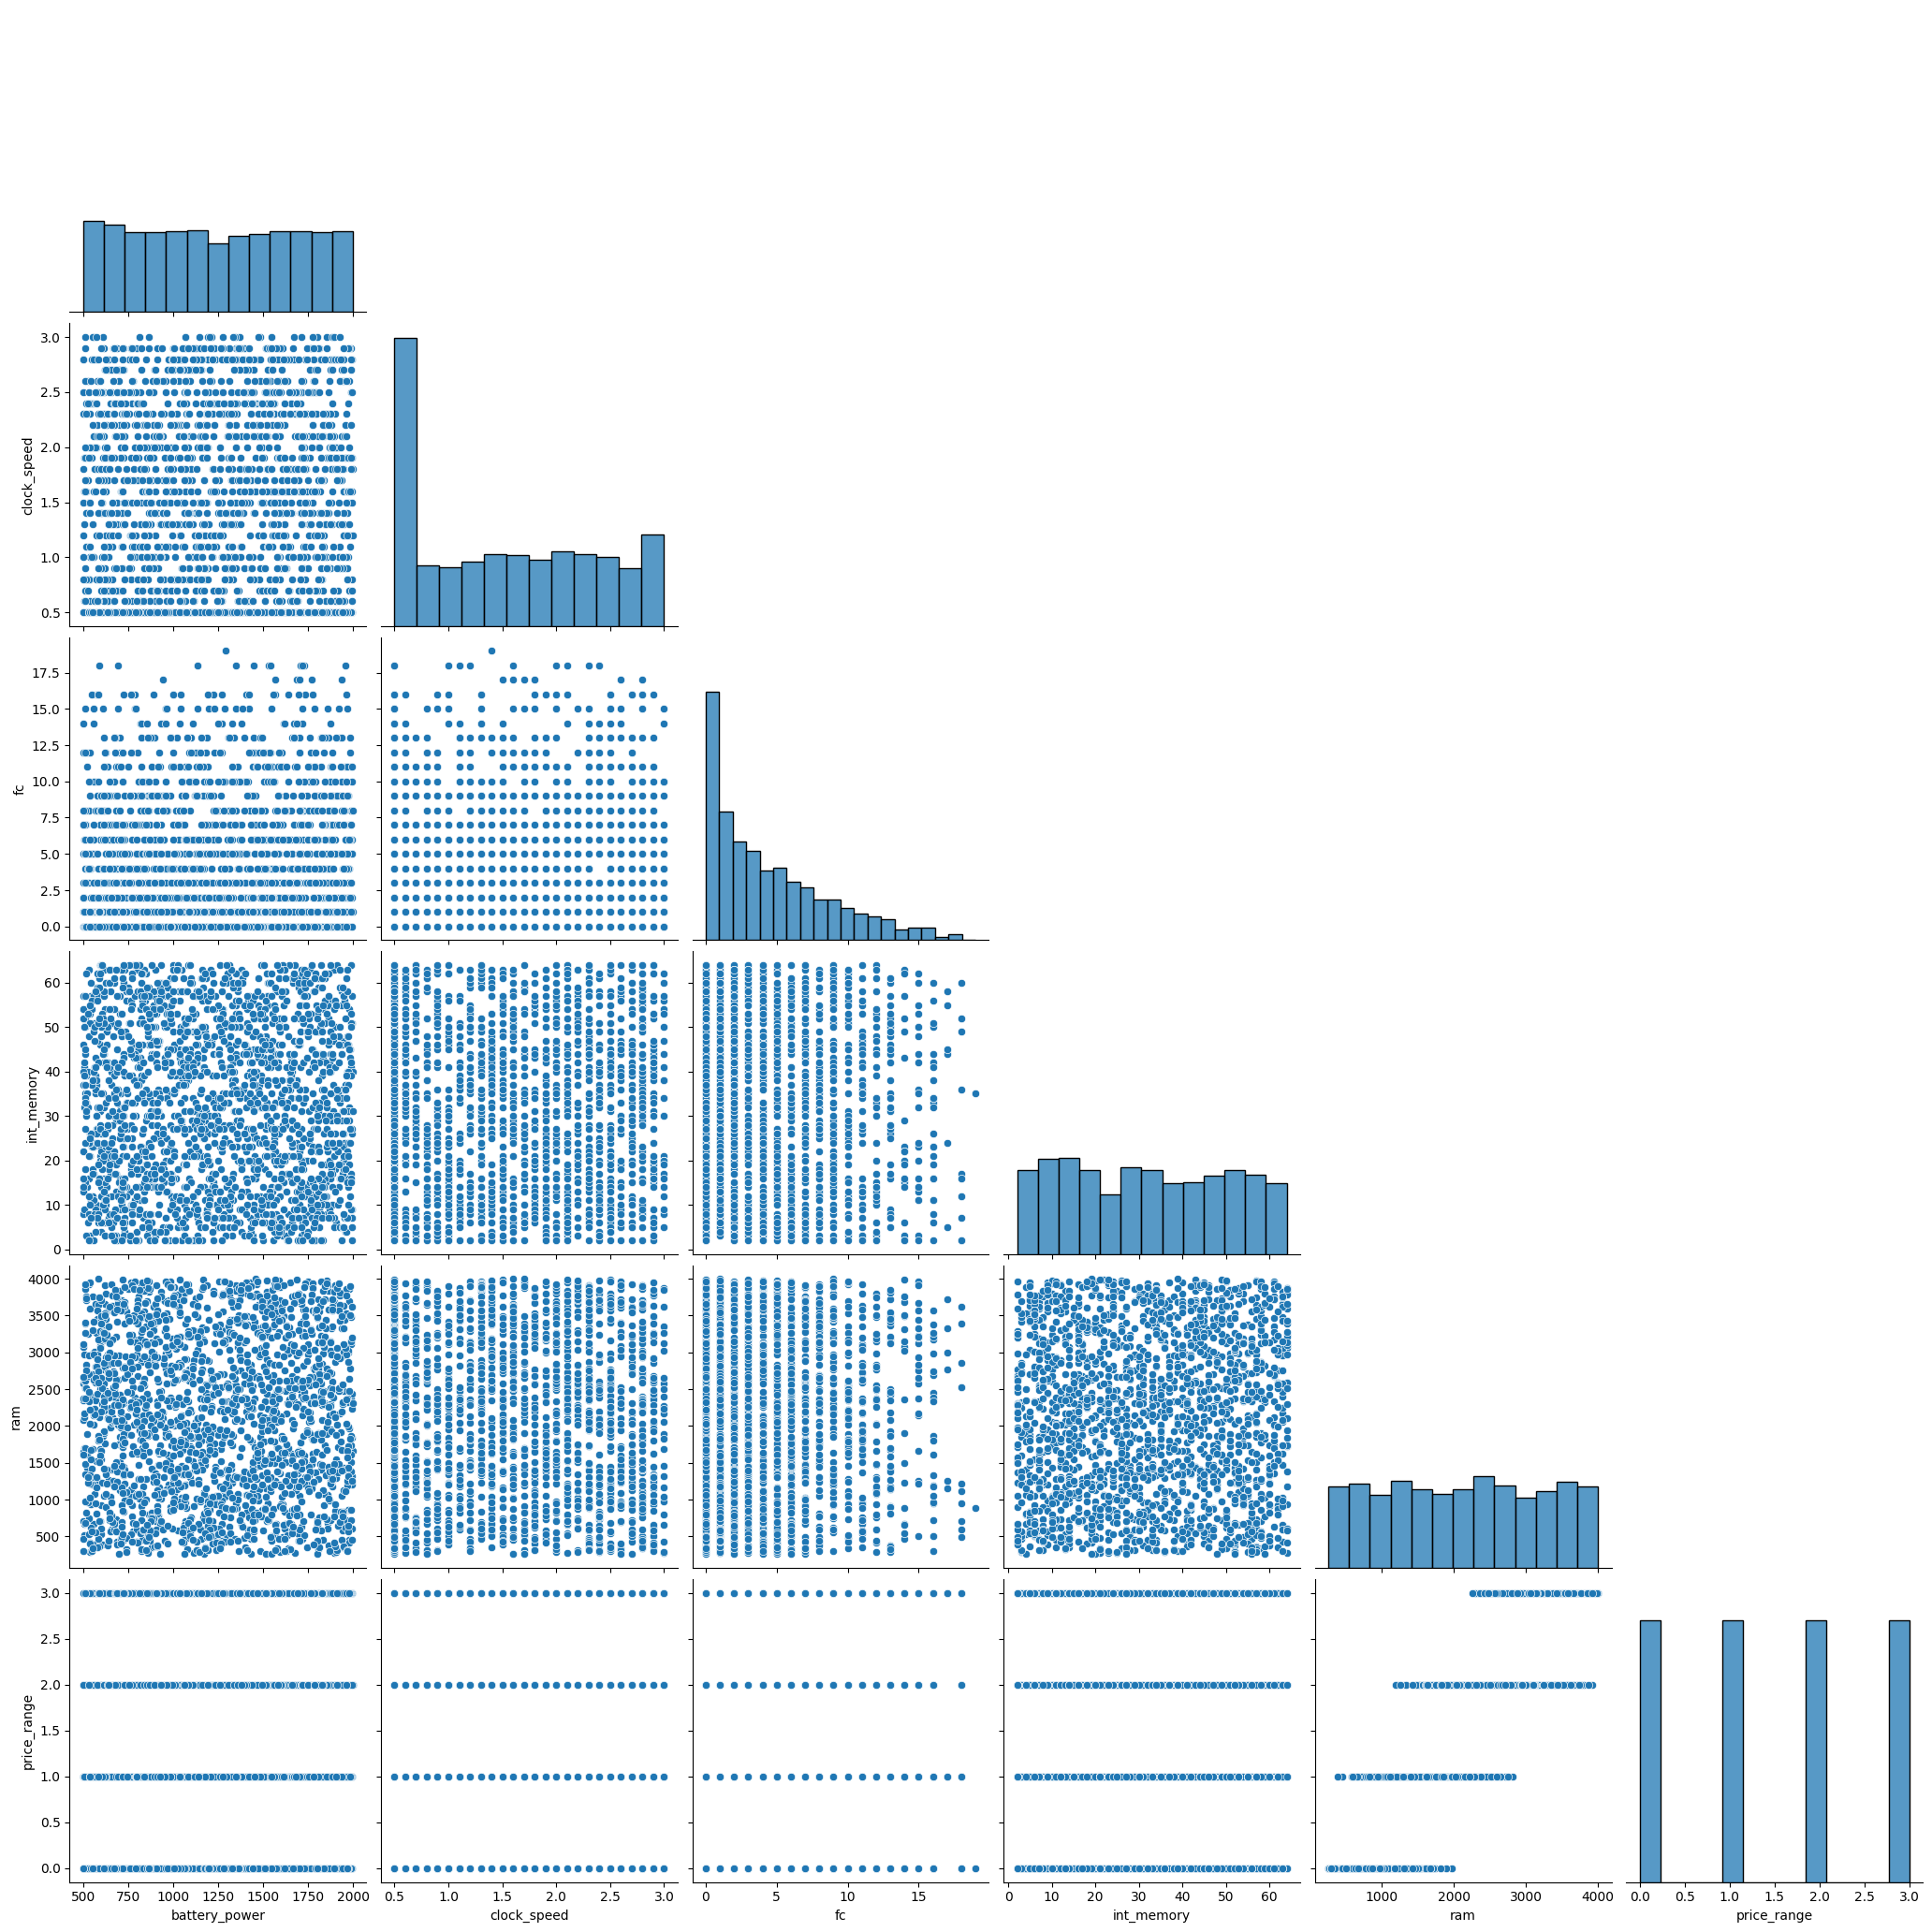

In [ ]:
sns.pairplot(df,vars=['battery_power','clock_speed','fc','int_memory','ram',"price_range"],diag_kind='auto',height=3.5,aspect=1,corner=True)

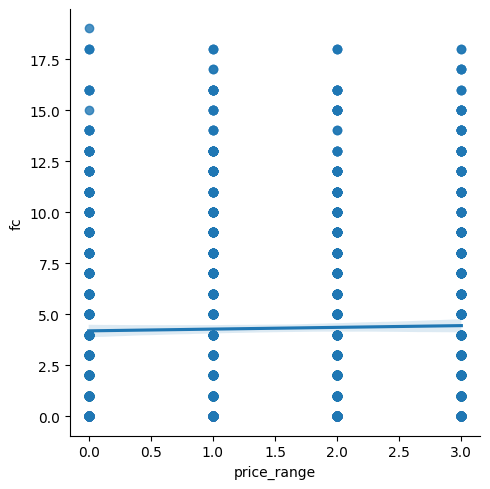

In [ ]:
sns.lmplot(x='price_range', y='fc',data=df)

In [ ]:
X = df[['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi']]
y = df['price_range']
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [ ]:
 y_train

,price_range
1719,0
1702,2
1287,3
482,0
768,3
...,...
835,3
1216,1
1653,3
559,0


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
 lr.coef_

array([ 5.11814616e-04,  9.23977205e-03, -7.45735034e-03, -2.84275379e-02,
        1.99897277e-03, -1.27351858e-02,  1.13326533e-03, -1.02605944e-02,
       -7.61981409e-04,  3.70806142e-03, -2.20451870e-03,  2.90110415e-04,
        2.85904218e-04,  9.47128449e-04, -8.16524730e-04,  1.06541138e-03,
        6.85663088e-05,  2.43402572e-02, -1.13013418e-02, -2.00537974e-02])

In [ ]:
coefficient = pd.DataFrame({
    'Features' : X.columns,
    'coefficient': lr.coef_
})
coefficient

,Features,coefficient
0,battery_power,0.000512
1,blue,0.009240
2,clock_speed,-0.007457
3,dual_sim,-0.028428
4,fc,0.001999
5,four_g,-0.012735
6,int_memory,0.001133
7,m_dep,-0.010261
8,mobile_wt,-0.000762
9,n_cores,0.003708


In [ ]:
#prediction

In [ ]:
prediction = lr.predict(X_test)
prediction.shape

(600,)

Text(0.5, 1.0, 'Evaluation of our ML model')

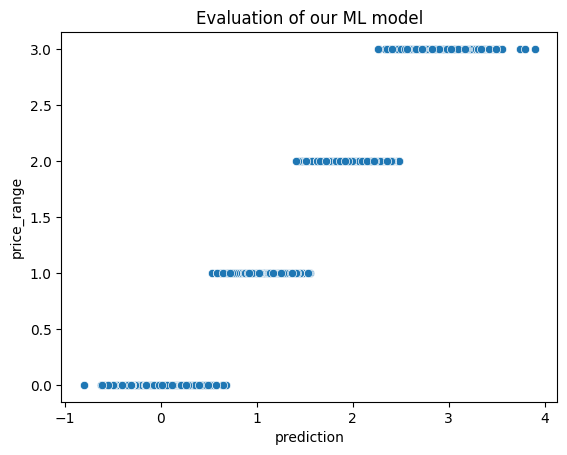

In [ ]:
sns.scatterplot(x=prediction,y=y_test)
plt.xlabel('prediction')
plt.title('Evaluation of our ML model')


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [ ]:
print('Mean Absolute Error for lr model',mean_absolute_error(y_test,prediction))
print("Mean squared Error for lr model:",mean_squared_error(y_test, prediction))
print('Root Mean Squared Error for lr model',math.sqrt(mean_absolute_error(y_test,prediction)))

Mean Absolute Error for lr model 0.2723912819018176
Mean squared Error for lr model: 0.10148186876893099
Root Mean Squared Error for lr model 0.521911182004963


In [ ]:
residuals = y_test - prediction
residuals

,price_range
405,0.275369
1190,0.198384
1132,0.225656
731,0.469690
1754,-0.366231
...,...
841,-0.365695
108,0.588706
665,-0.399555
1214,-0.225497


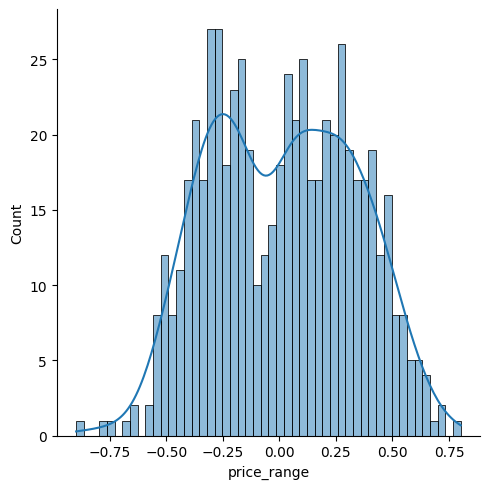

In [ ]:
sns.displot(residuals, bins=50, kde=True)

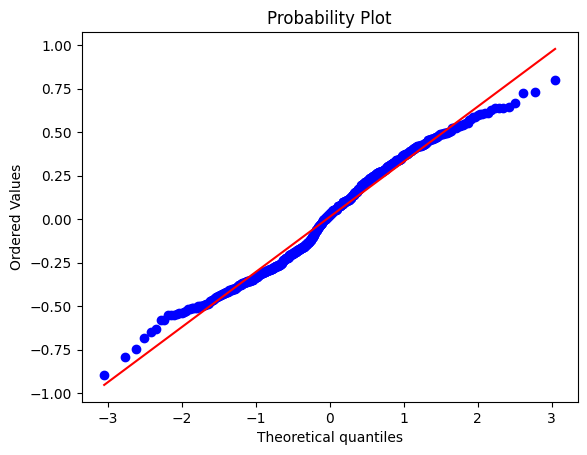

In [ ]:
import pylab
import scipy.stats as stats
stats.probplot(residuals, dist='norm', plot=pylab)
pylab.show()

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
rdg = Ridge(alpha=100)
rdg.fit(X_train, y_train)

Ridge(alpha=100)

In [ ]:
predict = rdg.predict(X_test)
predict.shape

(600,)

Text(0.5, 1.0, 'Evaluation of our ML Ridge-model')

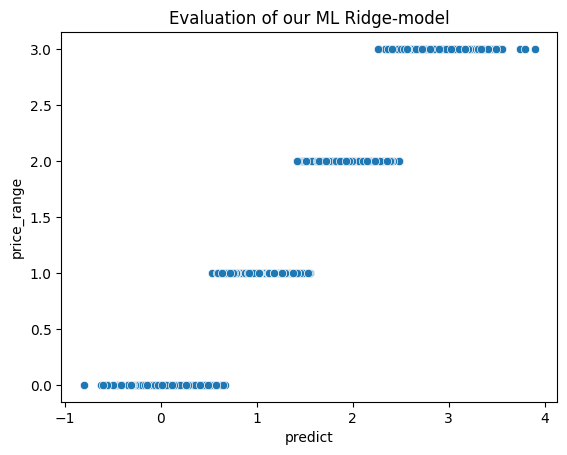

In [ ]:
sns.scatterplot(x=predict,y=y_test)
plt.xlabel('predict')
plt.title('Evaluation of our ML Ridge-model')

In [ ]:
print('Mean Absolute Error for rdg model',mean_absolute_error(y_test,predict))
print("Mean squared Error for rdg model:",mean_squared_error(y_test, predict))
print('Root Mean Squared Error for rdg model',math.sqrt(mean_absolute_error(y_test,predict)))

Mean Absolute Error for rdg model 0.2724204397169951
Mean squared Error for rdg model: 0.1014317346924163
Root Mean Squared Error for rdg model 0.5219391149521131


In [ ]:
train_score_lr = lr.score(X_train, y_train)
train_score_rdg = rdg.score(X_train, y_train)
print(f"Training R² Score: {train_score_lr}")
print(f"Training R² Score: {train_score_rdg}")

Training R² Score: 0.916689929115048
Training R² Score: 0.9166630883644136


In [ ]:
coefficient = pd.DataFrame({
    'Features' : X.columns,
    'coefficient': rdg.coef_
})
coefficient

,Features,coefficient
0,battery_power,0.000512
1,blue,0.006716
2,clock_speed,-0.006556
3,dual_sim,-0.022294
4,fc,0.002034
5,four_g,-0.005907
6,int_memory,0.001144
7,m_dep,-0.005363
8,mobile_wt,-0.000759
9,n_cores,0.003742


In [ ]:
from sklearn.linear_model import RidgeCV
rdgcv = RidgeCV(alphas=(0.1, 1.0, 10.0,20.0,100), cv=5)
rdgcv.fit(X_train, y_train)


RidgeCV(alphas=(0.1, 1.0, 10.0, 20.0, 100), cv=5)

In [ ]:
rdgcv.score(X_train, y_train)
print("Best alpha found:", rdgcv.alpha_)
print("Model score (R²) on test set:", rdgcv.score(X_test, y_test))

Best alpha found: 100.0
Model score (R²) on test set: 0.9216615654004732


In [ ]:
pre = rdgcv.predict(X_test)
pre[:10]

array([ 2.71935057, -0.19414019,  1.77195125,  1.53527777,  2.36626157,
       -0.33921997, -0.12646393,  2.47755378,  2.79423886,  1.12184528])

In [ ]:
print('Mean Absolute Error for rdgcv model',mean_absolute_error(y_test,pre))
print("Mean squared Error for rdgcv model:",mean_squared_error(y_test, pre))
print('Root Mean Squared Error for rdgcv model',math.sqrt(mean_absolute_error(y_test,pre)))

Mean Absolute Error for rdgcv model 0.2724204397169951
Mean squared Error for rdgcv model: 0.1014317346924163
Root Mean Squared Error for rdgcv model 0.5219391149521131


In [ ]:
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [ ]:
X,y = make_regression(n_features=4, n_informative=2, random_state=0)
X_train
elstic = ElasticNet(random_state= 0)
elstic.fit(X_train, y_train)

ElasticNet(random_state=0)

In [ ]:
prediction = elstic.predict(X_test)
prediction.shape

(600,)

In [ ]:
print('Mean Absolute Error for elstic model',mean_absolute_error(y_test,prediction))
print("Mean squared Error for elstic model:",mean_squared_error(y_test, prediction))
print('Root Mean Squared Error for elstic model',math.sqrt(mean_absolute_error(y_test,prediction)))

Mean Absolute Error for elstic model 0.271048700361769
Mean squared Error for elstic model: 0.1009157627367494
Root Mean Squared Error for elstic model 0.5206233766954467


## Logistic Regression model

In [ ]:
features = numec_cols.drop('price_range')
print(features)
X = mobile_data[features]
print(X.head())
y = mobile_data.price_range
print(y.head())

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')
   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  pc  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2   2         20       756  2549     9     7         19   
1        136        3   6        905      1988  2631    17     3          7   
2        145  

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.33, random_state=42)

In [ ]:
lR = LogisticRegression(penalty='elasticnet', solver='saga',l1_ratio=0.5, max_iter=10000000)
lR.fit(X_train, y_train)

LogisticRegression(l1_ratio=0.5, max_iter=10000000, penalty='elasticnet',
                   solver='saga')

In [ ]:
y_lR_pred =lR.predict(X_test)
y_lR_pred.shape

(660,)

In [ ]:
from sklearn.metrics import explained_variance_score, max_error
score = explained_variance_score(y_test, y_lR_pred)
print("Explained Variance Score:", score)


Explained Variance Score: 0.7343662599043104


In [ ]:
error = max_error(y_test, y_lR_pred)
print("Max Error:", error)

Max Error: 2


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(lR, X, y, cv=5, scoring='accuracy')


In [ ]:
print("cross_vslidation scores:", scores)
print("Mean cross_vslidation scores:", scores.mean())

cross_vslidation scores: [0.69   0.7    0.6925 0.6975 0.6875]
Mean cross_vslidation scores: 0.6935


In [ ]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc = svm.SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(X, y)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})

In [ ]:
sorted(clf.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_C',
 'param_kernel',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'split3_test_score',
 'split4_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [ ]:
print("Best Parameters:", clf.best_params_)


Best Parameters: {'C': 1, 'kernel': 'linear'}


In [ ]:
print("Best Cross-Validation Score:", clf.best_score_)


Best Cross-Validation Score: 0.9730000000000001


In [ ]:
best_model = clf.best_estimator_
y_pred = best_model.predict(X_test)  # if you have X_test
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


0.9924242424242424

In [ ]:
import pandas as pd
results = pd.DataFrame(clf.cv_results_)
results[['params', 'mean_test_score', 'rank_test_score']]


,params,mean_test_score,rank_test_score
0,"{'C': 1, 'kernel': 'linear'}",0.973,1
1,"{'C': 1, 'kernel': 'rbf'}",0.947,4
2,"{'C': 10, 'kernel': 'linear'}",0.970,2
3,"{'C': 10, 'kernel': 'rbf'}",0.961,3


from matplotlib import pyplot as plt
_df_0['mean_test_score'].plot(kind='hist', bins=20, title='mean_test_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['rank_test_score'].plot(kind='hist', bins=20, title='rank_test_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='mean_test_score', y='rank_test_score', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['mean_test_score'].plot(kind='line', figsize=(8, 4), title='mean_test_score')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['rank_test_score'].plot(kind='line', figsize=(8, 4), title='rank_test_score')
plt.gca().spines[['top', 'right']].set_visible(False)